In [156]:
import pandas as pd
import numpy as np
import re
import seaborn as  sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [157]:
#3번 광고데이터 불러오기, 합산 행 drop
contents_marketing_data = pd.read_excel('3.Contents-Marketing-Data.xlsx')
contents_marketing_data.drop([0],axis=0, inplace= True)

In [158]:
contents_marketing_data.head()

,캠페인 이름,광고 세트 이름,광고 이름,연령,성,일,결과,도달수,노출,결과당 비용,...,페이지 좋아요,게시물 댓글,게시물 참여,게시물 공감,게시물 저장,게시물 공유,사진 조회,고유 아웃바운드 클릭,보고 시작,보고 종료
1,1 (전체),1 (페이스북),1 - 2(페이스북 상세),13-17,female,2021-03-29,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-29,2021-03-29
2,8 - 남자 (전체),8 (페이스북),8 - 2(페이스북 상세),25-34,male,2021-03-29,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-29,2021-03-29
3,6 (전체),6 (인스타피드),6 - 1(인스타피드 상세),25-34,female,2021-03-28,25.0,927,931,292.08,...,NaN,NaN,29.0,2.0,2.0,NaN,NaN,25.0,2021-03-28,2021-03-28
4,6 (전체),6 (인스타피드),6 - 1(인스타피드 상세),13-17,unknown,2021-03-28,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-28,2021-03-28
5,6 (전체),6 (페이스북),6 - 2(페이스북 상세),35-44,female,2021-03-28,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-28,2021-03-28


In [159]:
contents_marketing_data.columns

Index(['캠페인 이름', '광고 세트 이름', '광고 이름', '연령', '성', '일', '결과', '도달수', '노출',
       '결과당 비용', '지출 금액 (KRW)', '빈도', '고유 링크 클릭', '링크 클릭', '랜딩 페이지 조회',
       '랜딩 페이지 조회당 비용', 'CPC(링크 클릭당 비용)', 'CPM(1,000회 노출당 비용)', 'CTR(전체)',
       '페이지 참여', '페이지 좋아요', '게시물 댓글', '게시물 참여', '게시물 공감', '게시물 저장', '게시물 공유',
       '사진 조회', '고유 아웃바운드 클릭', '보고 시작', '보고 종료'],
      dtype='object')

##### 광고 이름에서 소셜 미디어 정보 추출

In [160]:
contents_marketing_data[['광고 이름']].head()

,광고 이름
1,1 - 2(페이스북 상세)
2,8 - 2(페이스북 상세)
3,6 - 1(인스타피드 상세)
4,6 - 1(인스타피드 상세)
5,6 - 2(페이스북 상세)


In [161]:
#소셜미디어종류 추출 함수
def get_social_media(x):
    if'인스타피드'in str(x)  :
        return '인스타피드'
    elif  '인스타스토리' in str(x):
        return '인스타스토리'
    elif '페이스북' in str(x):
        return '페이스북'

In [162]:
# 광고이름에서 소셜 미디어 추출
contents_marketing_data['소셜 미디어 종류'] = contents_marketing_data['광고 이름'].apply(lambda x : get_social_media(x))
#광고이름에서 소셜미디어 삭제
contents_marketing_data['광고 이름'] =contents_marketing_data['광고 이름'].str.extract(pat = '([0-9]+ \- [0-9])')
contents_marketing_data[['광고 이름']].head()

,광고 이름
1,1 - 2
2,8 - 2
3,6 - 1
4,6 - 1
5,6 - 2


###### unknown 성별 데이터 제거

In [163]:
#성별 unknown 데이터 확인
contents_marketing_data[contents_marketing_data['성'] =='unknown'].mean()

C:\Users\qkrwl\AppData\Local\Temp/ipykernel_13472/3501994437.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  contents_marketing_data[contents_marketing_data['성'] =='unknown'].mean()


결과                       1.000000
도달수                      1.973451
노출                       1.973451
결과당 비용                  12.000000
지출 금액 (KRW)             12.115290
빈도                       1.000000
고유 링크 클릭                 1.000000
링크 클릭                    1.000000
랜딩 페이지 조회                1.000000
랜딩 페이지 조회당 비용           12.000000
CPC(링크 클릭당 비용)          12.000000
CPM(1,000회 노출당 비용)    6706.240976
CTR(전체)                  0.221239
페이지 참여                   1.000000
페이지 좋아요                       NaN
게시물 댓글                        NaN
게시물 참여                   1.000000
게시물 공감                   1.000000
게시물 저장                        NaN
게시물 공유                        NaN
사진 조회                         NaN
고유 아웃바운드 클릭              1.000000
dtype: float64

In [164]:
#성별 unknown 데이터 제거
contents_marketing_data = contents_marketing_data[contents_marketing_data['성'] !='unknown']

##### 분석을 위한 결과조회 함수

In [165]:
# 결과조회 함수 
# '광고','소셜미디어', '성', '연령' 중 groupby하고싶은 값들을 x에 대입하면 그에 따른 결과값들을 볼수 있는 함수
# 분석에 필요한 결과값은 '랜딩페이지 조회','링크 클릭', '도달수', '노출','노출','지출 금액 (KRW)', '랜딩 페이지 조회당 비용''1000회 노출당 랜딩페이지조회','CPC(링크 클릭당 비용)','CPM(1,000회 노출당 비용)','빈도'
def 결과조회(x):
    a = contents_marketing_data[['광고 이름','소셜 미디어 종류','성','연령','랜딩 페이지 조회','링크 클릭','도달수','노출','지출 금액 (KRW)']].groupby(x).sum()
    
    a['랜딩 페이지 조회당 비용'] = a['지출 금액 (KRW)'] / a['랜딩 페이지 조회']
    a['1000회 노출당 랜딩페이지조회'] = 1000 * a['랜딩 페이지 조회']/a['노출']
    a['CPC(링크 클릭당 비용)'] = a['지출 금액 (KRW)'] / a['링크 클릭']
    a['빈도'] = a['노출']/a['도달수']
    a['CPM(1,000회 노출당 비용)'] = 1000 * a['지출 금액 (KRW)']/a['노출']
    
    return a


In [168]:
# ex)
결과조회(['성', '연령'])

랜딩 페이지 조회  링크 클릭    도달수     노출    지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
성      연령                                                                    
female 13-17      168.0  198.0  14015  14513   46965.045286     279.553841   
       18-24      567.0  702.0  29783  30700  167238.498251     294.953260   
       25-34      405.0  495.0  15041  15297  127335.496557     314.408633   
       35-44       69.0   82.0   2467   2494   22715.115376     329.204571   
       45-54       17.0   19.0    602    614    4795.047901     282.061641   
male   13-17       17.0   24.0   2737   2940    6983.289181     410.781717   
       18-24       31.0   38.0   2203   2293    9952.350088     321.043551   
       25-34       72.0   91.0   6131   6473   30825.506195     428.132030   
       35-44        8.0   13.0   1167   1199    6835.599873     854.449984   
       45-54        3.0    4.0    519    541    2484.023495     828.007832   

              1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  CPM(1,000회 노출당 비용)  
성      연령                                                                      
female 13-17          11.575829      237.197198  1.035533         3236.067339  
       18-24          18.469055      238.231479  1.030789         5447.508086  
       25-34          26.475780      257.243427  1.017020         8324.213673  
       35-44          27.666399      277.013602  1.010944         9107.905122  
       45-54          27.687296      252.370942  1.019934         7809.524269  
male   13-17           5.782313      290.970383  1.074169         2375.268429  
       18-24          13.519407      261.903950  1.040853         4340.318398  
       25-34          11.123127      338.741826  1.055782         4762.166877  
       35-44           6.672227      525.815375  1.027421         5701.084131  
       45-54           5.545287      621.005874  1.042389         4591.540655

##### 연령에 따른 분석

Text(0.5, 1.0, '1000회 노출당 랜딩페이지조회')

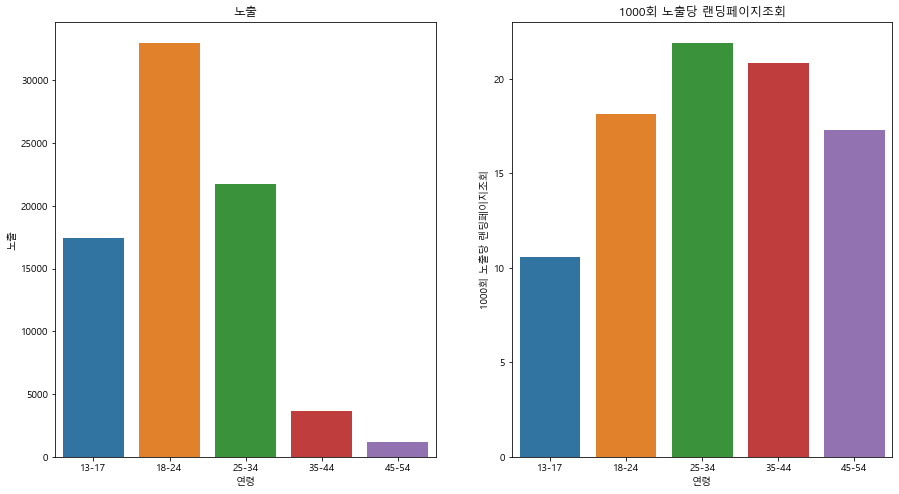

In [169]:
#연령에 따른 분석

age = 결과조회(['연령'])
fig, ax = plt.subplots(1,2 , figsize=(15,8))
sns.barplot(data=age,x=age.index, y = '노출', ax =ax[0]).set_title('노출')
sns.barplot(data=age,x = age.index,y = '1000회 노출당 랜딩페이지조회', ax =ax[1]).set_title('1000회 노출당 랜딩페이지조회')

##### 소셜미디어에 따른 분석

In [170]:
결과조회(['소셜 미디어 종류'])

,랜딩 페이지 조회,링크 클릭,도달수,노출,지출 금액 (KRW),랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회,CPC(링크 클릭당 비용),빈도,"CPM(1,000회 노출당 비용)"
소셜 미디어 종류,,,,,,,,,,
인스타스토리,176.0,205.0,14580,14815,51441.000000,292.278409,11.879852,250.931707,1.016118,3472.224097
인스타피드,763.0,910.0,33002,33178,232712.000000,304.996068,22.997167,255.727473,1.005333,7014.045452
페이스북,418.0,551.0,27083,29071,141976.972201,339.657828,14.378590,257.671456,1.073404,4883.800771


,1000회 노출당 랜딩페이지조회,"CPM(1,000회 노출당 비용)",랜딩 페이지 조회당 비용
소셜 미디어 종류,,,
인스타스토리,11.879852,3472.224097,292.278409
인스타피드,22.997167,7014.045452,304.996068
페이스북,14.378590,4883.800771,339.657828


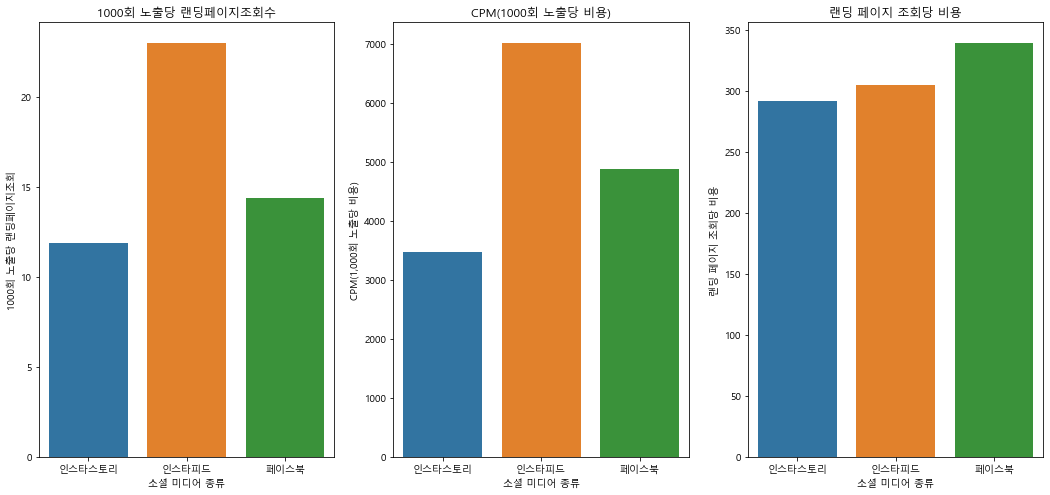

In [171]:
#소셜미디어 종류에 따른 주요 결과값들 비교
soc = 결과조회(['소셜 미디어 종류'])
fig,ax = plt.subplots(1,3,figsize=(18,8))

sns.barplot(data=soc,x=soc.index, y = '1000회 노출당 랜딩페이지조회', ax = ax[0]).set_title('1000회 노출당 랜딩페이지조회수')
sns.barplot(data=soc,x=soc.index, y = 'CPM(1,000회 노출당 비용)',ax = ax[1]).set_title('CPM(1000회 노출당 비용)')
sns.barplot(data=soc,x=soc.index, y = '랜딩 페이지 조회당 비용',ax=ax[2]).set_title('랜딩 페이지 조회당 비용')
soc[['1000회 노출당 랜딩페이지조회', 'CPM(1,000회 노출당 비용)','랜딩 페이지 조회당 비용']]

랜딩 페이지 조회  링크 클릭    도달수     노출   지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
소셜 미디어 종류 성                                                                     
인스타스토리    female      169.0  198.0  13816  14044   49204.00000     291.147929   
          male          7.0    7.0    764    771    2237.00000     319.571429   
인스타피드     female      695.0  834.0  29380  29545  210939.00000     303.509353   
          male         68.0   76.0   3622   3633   21773.00000     320.191176   
페이스북      female      362.0  464.0  18712  20029  108906.20337     300.845866   
          male         56.0   87.0   8371   9042   33070.76883     590.549443   

                  1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  \
소셜 미디어 종류 성                                                     
인스타스토리    female          12.033609      248.505051  1.016503   
          male             9.079118      319.571429  1.009162   
인스타피드     female          23.523439      252.924460  1.005616   
          male            18.717314      286.486842  1.003037   
페이스북      female          18.073793      234.711645  1.070383   
          male             6.193320      380.123780  1.080158   

                  CPM(1,000회 노출당 비용)  
소셜 미디어 종류 성                           
인스타스토리    female         3503.560239  
          male           2901.426719  
인스타피드     female         7139.583686  
          male           5993.118635  
페이스북      female         5437.425901  
          male           3657.461715

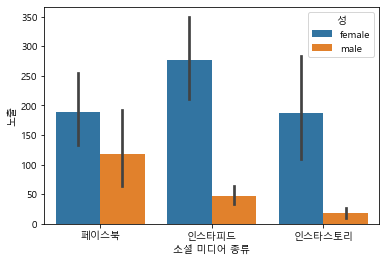

In [182]:
#페이스북의 비용이 비싼 원인 분석
#페이스북 광고의 남자 비율이 높다
sns.barplot(data = contents_marketing_data ,x='소셜 미디어 종류', y = '노출', hue = '성')
결과조회(['소셜 미디어 종류','성'])

,지출 금액 (KRW)
소셜 미디어 종류,
인스타스토리,51441.000000
인스타피드,232712.000000
페이스북,141976.972201


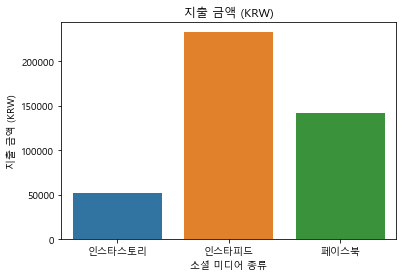

In [183]:
# 광고지출의 페이스북 비율 확인
sns.barplot(data =soc, x=soc.index,y='지출 금액 (KRW)').set_title('지출 금액 (KRW)')
soc[['지출 금액 (KRW)']]

#####  광고 카테고리& 광고 copy 별 분석

In [184]:
#데이터 확인
결과조회(['광고 이름'])

,랜딩 페이지 조회,링크 클릭,도달수,노출,지출 금액 (KRW),랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회,CPC(링크 클릭당 비용),빈도,"CPM(1,000회 노출당 비용)"
광고 이름,,,,,,,,,,
1 - 1,37.0,49.0,3188,3334,12124.000000,327.675676,11.097780,247.428571,1.045797,3636.472705
1 - 2,151.0,173.0,12075,12459,37845.974482,250.635593,12.119753,218.762858,1.031801,3037.641422
1 - 3,48.0,58.0,4423,4634,17357.000000,361.604167,10.358222,299.258621,1.047705,3745.576176
10 - 1,66.0,94.0,3595,3748,21864.000000,331.272727,17.609392,232.595745,1.042559,5833.511206
10 - 2,74.0,92.0,3840,3909,22823.000000,308.418919,18.930673,248.076087,1.017969,5838.577641
2 - 1,134.0,165.0,8044,8489,41271.000000,307.992537,15.785134,250.127273,1.055321,4861.703381
2 - 2,9.0,16.0,574,591,3575.000000,397.222222,15.228426,223.437500,1.029617,6049.069374
3 - 1,147.0,183.0,7792,8042,44910.000000,305.510204,18.279035,245.409836,1.032084,5584.431733
3 - 2,0.0,0.0,12,12,25.000000,inf,0.000000,inf,1.000000,2083.333333


<AxesSubplot:xlabel='광고 이름', ylabel='1000회 노출당 랜딩페이지조회'>

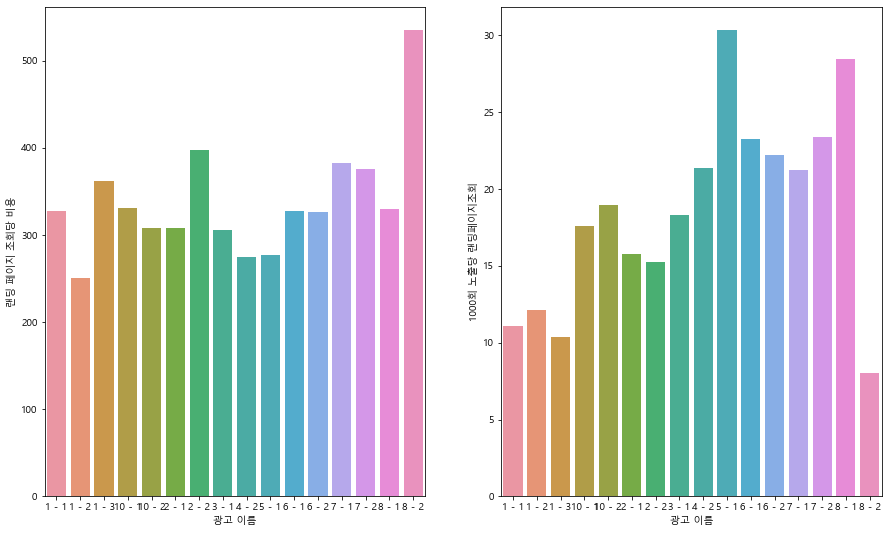

In [185]:
# 100회 이상의 노출수의 광고추출
adv = 결과조회(['광고 이름'])
adv = adv[adv['노출']>=100]
#랜딩페이지조회당 비용, 1000회 노출당 랜딩페이지조회 확인
fig, ax = plt.subplots(1,2,figsize=(15,9))

sns.barplot(data =adv,x=adv.index, y ='랜딩 페이지 조회당 비용',ax=ax[0])

sns.barplot(data =adv,x=adv.index, y ='1000회 노출당 랜딩페이지조회',ax=ax[1],)


In [204]:
결과조회(['광고 이름'])[['랜딩 페이지 조회당 비용','1000회 노출당 랜딩페이지조회']].sort_values(by='1000회 노출당 랜딩페이지조회',ascending =False)

,랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회
광고 이름,,
5 - 2,162.000000,64.516129
5 - 1,276.801242,30.314442
8 - 1,330.220588,28.451883
7 - 2,375.313725,23.394495
6 - 1,327.105673,23.273415
6 - 2,325.928571,22.187005
4 - 2,275.282209,21.374246
7 - 1,382.492537,21.256345
10 - 2,308.418919,18.930673


###### 남성의 광고결과 분석

In [187]:
#데이터 확인
sex_adv = 결과조회(['성','광고 이름'])
sex_adv

랜딩 페이지 조회  링크 클릭    도달수     노출   지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
성      광고 이름                                                                 
female 1 - 1        33.0   41.0   2289   2383   9790.353924     296.677392   
       1 - 2       139.0  157.0  10484  10780  33756.981289     242.855980   
       1 - 3        44.0   54.0   3729   3871  15198.000000     345.409091   
       10 - 1       61.0   88.0   3264   3412  20080.000000     329.180328   
       10 - 2       61.0   77.0   3228   3280  19317.000000     316.672131   
       2 - 1       120.0  149.0   7082   7467  37361.000000     311.341667   
       2 - 2         8.0   14.0    510    522   3154.000000     394.250000   
       3 - 1       147.0  183.0   7792   8042  44910.000000     305.510204   
       3 - 2         0.0    0.0     12     12     25.000000            inf   
       4 - 1         0.0    0.0     10     10     90.000000            inf   
       4 - 2       163.0  209.0   7538   7626  44871.000000     275.282209   
       5 - 1       161.0  187.0   5192   5311  44565.000000     276.801242   
       5 - 2         2.0    2.0     29     31    324.000000     162.000000   
       6 - 1       101.0  115.0   4080   4147  33763.868157     334.295724   
       6 - 2        13.0   13.0    480    482   3587.000000     275.923077   
       7 - 1        60.0   71.0   2196   2227  20128.000000     335.466667   
       7 - 2        45.0   52.0   1619   1625  15673.000000     348.288889   
       8 - 1        68.0   84.0   2374   2390  22455.000000     330.220588   
male   1 - 1         4.0    8.0    899    951   2333.646076     583.411519   
       1 - 2        12.0   16.0   1591   1679   4088.993192     340.749433   
       1 - 3         4.0    4.0    694    763   2159.000000     539.750000   
       10 - 1        5.0    6.0    331    336   1784.000000     356.800000   
       10 - 2       13.0   15.0    612    629   3506.000000     269.692308   
       2 - 1        14.0   16.0    962   1022   3910.000000     279.285714   
       2 - 2         1.0    2.0     64     69    421.000000     421.000000   
       6 - 1        22.0   24.0   1109   1138   6470.129562     294.096798   
       6 - 2         1.0    1.0    147    149    976.000000     976.000000   
       7 - 1         7.0   10.0    900    925   5499.000000     785.571429   
       7 - 2         6.0    8.0    544    555   3468.000000     578.000000   
       8 - 2        42.0   60.0   4904   5230  22465.000000     534.880952   

               1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  CPM(1,000회 노출당 비용)  
성      광고 이름                                                                    
female 1 - 1           13.848091      238.789120  1.041066         4108.415411  
       1 - 2           12.894249      215.012620  1.028233         3131.445389  
       1 - 3           11.366572      281.444444  1.038080         3926.117282  
       10 - 1          17.878077      228.181818  1.045343         5885.111372  
       10 - 2          18.597561      250.870130  1.016109         5889.329268  
       2 - 1           16.070711      250.744966  1.054363         5003.481987  
       2 - 2           15.325670      225.285714  1.023529         6042.145594  
       3 - 1           18.279035      245.409836  1.032084         5584.431733  
       3 - 2            0.000000             inf  1.000000         2083.333333  
       4 - 1            0.000000             inf  1.000000         9000.000000  
       4 - 2           21.374246      214.693780  1.011674         5883.949646  
       5 - 1           30.314442      238.315508  1.022920         8391.075127  
       5 - 2           64.516129      162.000000  1.068966        10451.612903  
       6 - 1           24.354955      293.598854  1.016422         8141.757453  
       6 - 2           26.970954      275.923077  1.004167         7441.908714  
       7 - 1           26.942075      283.492958  1.014117         9038.167939  
       7 - 2           27.692308      301.403846  1.003706  

In [188]:
#남성의 데이터 확인
man_adv= 결과조회(['성','광고 이름'])[['1000회 노출당 랜딩페이지조회']].drop([( 'female',  '1 - 1'),
            ( 'female',  '1 - 2'),
            ( 'female',  '1 - 3'),
            ( 'female', '10 - 1'),
            ( 'female', '10 - 2'),
            ( 'female',  '2 - 1'),
            ( 'female',  '2 - 2'),
            ( 'female',  '3 - 1'),
            ( 'female',  '3 - 2'),
            ( 'female',  '4 - 1'),
            ( 'female',  '4 - 2'),
            ( 'female',  '5 - 1'),
            ( 'female',  '5 - 2'),
            ( 'female',  '6 - 1'),
            ( 'female',  '6 - 2'),
            ( 'female',  '7 - 1'),
            ( 'female',  '7 - 2'),
            ( 'female',  '8 - 1')],axis =0)
man_adv.sort_values('1000회 노출당 랜딩페이지조회', ascending=False)

1000회 노출당 랜딩페이지조회
성    광고 이름                    
male 10 - 2          20.667727
     6 - 1           19.332162
     10 - 1          14.880952
     2 - 2           14.492754
     2 - 1           13.698630
     7 - 2           10.810811
     8 - 2            8.030593
     7 - 1            7.567568
     1 - 2            7.147111
     6 - 2            6.711409
     1 - 3            5.242464
     1 - 1            4.206099

In [202]:
#같은 광고에서의 성별 성과 분석
결과조회(['광고 이름', '성'])[['1000회 노출당 랜딩페이지조회']].sort_index(ascending = False)

1000회 노출당 랜딩페이지조회
광고 이름  성                        
8 - 2  male             8.030593
8 - 1  female          28.451883
7 - 2  male            10.810811
       female          27.692308
7 - 1  male             7.567568
       female          26.942075
6 - 2  male             6.711409
       female          26.970954
6 - 1  male            19.332162
       female          24.354955
5 - 2  female          64.516129
5 - 1  female          30.314442
4 - 2  female          21.374246
4 - 1  female           0.000000
3 - 2  female           0.000000
3 - 1  female          18.279035
2 - 2  male            14.492754
       female          15.325670
2 - 1  male            13.698630
       female          16.070711
10 - 2 male            20.667727
       female          18.597561
10 - 1 male            14.880952
       female          17.878077
1 - 3  male             5.242464
       female          11.366572
1 - 2  male             7.147111
       female          12.894249
1 - 1  male             4.206099
       female          13.848091